# Project NLP

### Cel projektu:

    Celem projektu jest wykorzystanie danych - rezencje filmowe


#### 1. Wstęp

    1.Zaimportowanie bibliotek
    2.Odczytanie zbioru recenzji - format csv


#### 2.Preprocessing
    
    Cel: peprocessing ma na celu przygotować dane i oczyścić ze znaków, które nie wnoszą wiele do analizy, a wrecz przeszkadzają.

    input csv --> krotki 
    
    1. Czy dane są zbalansowane? - tak
    2.Filtracja znakow HTML, znaków i liczb- regex
    3.Zmniejszenie znakow - lower()
    4.Filtracja stopwords
    

#### 3.Wstępna analiza tekstu

    1. Ilość wszystkich słow i słow unikalnych
       Słowa unikalne są bardzo ważne do tworzenia featerów
    2. Częstotliwość występowania słów - FreqDist()
    3. Wykres 40 najpopularniejszych slow

#### 4.Analiza danych za pomocą klasycznych algorytmów nauczania maszynowego i reprezentacji Bag of Words

    1. Znalezienie najlepiej perfomującego algortmu klasyfikacji
        1. Naive Bayes
        2. Logistic regression
        3. SVM
        4. Uzycie wszystkich
    2. Stworzenie Bag of Words oraz klasyfikacja z jedną funkcją liniową

#### 5.Analiza tekstu w oparciu o sieci neuronowe

    1. Sieć neuronowa oparta o GloVe
    2. LSTM
    3. GRU


# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_input = "/content/drive/MyDrive/movies_data.csv"

Mounted at /content/drive


# 1. Wstęp

In [ ]:
#Sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier #do regresji logistycznej
from sklearn.svm import SVC, LinearSVC, NuSVC # do SVN
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Pytorch
import torch
import torch.nn as nn
import torch.autograd as autograd
import torchtext
import torch.nn.functional as F

#data analysis
import pandas as pd
import numpy as np
import regex as re

#NLTK
import nltk
import nltk.classify 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.probability import FreqDist
from nltk.classify import ClassifierI
from nltk.classify import ClassifierI
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader #do czytania kolekcji dokumentow
from nltk.classify.scikitlearn import SklearnClassifier

#Graphs
import matplotlib.pyplot as plt #biblioteka do rysowania wykresow

#Others
from statistics import mean 
from statistics import mode
import math
import random
from random import shuffle 
import string 
import pickle

nltk.download()
nltk.download('stopwords') ##dwie linii w dół - bez tych komend nie dział nltk
nltk.download('punkt')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

# 2. Preprocessing

In [ ]:
#Data preprocessing

reviews = pd.read_csv(path_input, encoding = 'utf-8', header = None)

#counting positives/negatives reviews with header = TRUE
reviews2 = pd.read_csv(path_input)
print("Czy dane są zbalansowane? -> TAK")
print("negatives ", reviews2.isin([0]).sum())
print("positives ", reviews2.isin([1]).sum())
#Początkowe dane są zbalansowane

print ('Data preprocessing\n\n')
pos_neg_01 = [x for x in reviews[1:][1]]

def preprocess(text):
    stop_words =  set(stopwords.words("english"))
    clean_data = []
    for x in (reviews[1:50000][0]): ##zmienione
        new_text = re.sub('<.*?>', '', x)   # remove HTML tags
        new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
        new_text = re.sub(r'\d+','',new_text)# remove numbers
        new_text = new_text.lower() # lower case
        new_text = [elem for elem in word_tokenize(new_text) if elem not in stop_words]
        if new_text != []: 
            clean_data.append(new_text)
    return clean_data
clean_data = preprocess(reviews) #format [[slowo1,slowo2],[],[]..]

#robiebie krotek poz/neg

def tuples_clean(data_t, pos_neg_data):
    clean_data_pos_neg = []
    for i in range (len(data_t)):
        if data_t[i] != []:
            clean_data_pos_neg.append((data_t[i], int(pos_neg_data[i])))
    return clean_data_pos_neg

clean_data_01 = tuples_clean(clean_data, pos_neg_01) 
#format [([slowo1,slowo2,],1),([slowo1,slowo2,],0)]

Czy dane są zbalansowane? -> TAK
negatives  review           0
sentiment    25000
dtype: int64
positives  review           0
sentiment    25000
dtype: int64
Data preprocessing




In [ ]:
#jak wyglądają moje dane:
clean_data_01[1:10]

[(['ok',
   'really',
   'like',
   'kris',
   'kristofferson',
   'usual',
   'easy',
   'going',
   'delivery',
   'lines',
   'movies',
   'age',
   'helped',
   'soft',
   'spoken',
   'low',
   'energy',
   'style',
   'steal',
   'scene',
   'effortlessly',
   'disappearance',
   'misstep',
   'holy',
   'moly',
   'bad',
   'movie',
   'must',
   'give',
   'kudos',
   'cinematography',
   'actors',
   'including',
   'kris',
   'trying',
   'darndest',
   'make',
   'sense',
   'goofy',
   'confusing',
   'story',
   'none',
   'made',
   'sense',
   'kris',
   'probably',
   'didnt',
   'understand',
   'either',
   'going',
   'motions',
   'hoping',
   'someone',
   'would',
   'come',
   'tell',
   'dont',
   'care',
   'everyone',
   'movie',
   'love',
   'project',
   'nonsense',
   'ive',
   'seen',
   'low',
   'budget',
   'movies',
   'plot',
   'goodness',
   'sake',
   'none',
   'zilcho',
   'nada',
   'zippo',
   'empty',
   'reason',
   'complete',
   'waste',
 

# 3. Analiza 

Wstepna analiza tekstu


Ile wystepuje slow we szystkich recenzjach po preprocessingu:5929175
przy tym unikatowych z nich jest:214932


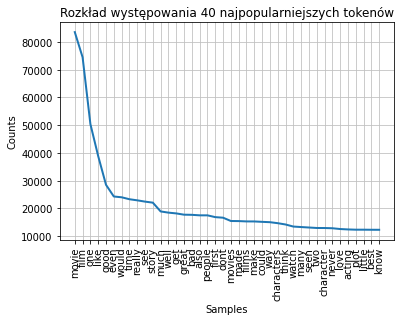

In [ ]:
#2. wstepna analiza tekstu, slowa unikatowe i ich reprezentacja na wykresie

print('Wstepna analiza tekstu\n\n')

def count_words(data_t):
    all_words = []
    for w in data_t:
        for j in w:
            all_words.append(j)
    return all_words

all_words_list = count_words(clean_data)

print(f'Ile wystepuje slow we szystkich recenzjach po preprocessingu:{len(all_words_list)}\nprzy tym unikatowych z nich jest:{len(set(all_words_list))}') #ile wystepuje slow po processingu we wszystkich recenzjach
  
#zliczanie częstosci występowania tych slow
all_words_list = nltk.FreqDist(all_words_list)

#40 najpopularniejszych slow
word_features = all_words_list.most_common(40)

all_words_list.plot(40,title='Rozkład występowania 40 najpopularniejszych tokenów')

Można zauważyć że 2 najpularniejsze słowa w recenzjach to ku zdziwieniu "movie" i "film". Natomiast w tak dużym zbiorze danch bardzo szybko pojawiają się unikalne słowa.

# 3. Algoytmy nauczania maszynowego

In [ ]:
print("Analiza danych za pomocą klasycznych algorytmów nauczania maszynowego i reprezentacji Set of Words.\n\n")

# dane treningowe i testowe (80 i 20 proc) - sa juz w samych modelach dla mozliwosci miksowania data

word_features_true = [x[0] for x in all_words_list.most_common(600)] #daje 600 bo nie mam tyle RAMU, przy 3k crashuje ##zmienione
#print(word_features_true)
#Tworze funkcje, ktorej argumentami będzie lista wyrazow, a ktora będzie wywolywana dla kolejnych recenzji, będe sprawdzal czy występują w niej slowa z word_features

def find_features(document): #przez document rozumiemy tutaj lista wyrazow
    words = set(document)    #patrze na unikatowe slowa
    features = {}            #tworzę pusty slownik
    for w in word_features_true: #word_features zdefiniowane wyzej [lista 600 najczęstych slow we wszystkich recenzjach]
        features[w] = (w in words) #True or False, dla kazdego slowa z word_features w zaleznosci czy jest czy nie w dokumencie
    return features

featuresets = [(find_features(rev),category) for (rev,category) in clean_data_01] #zapisuje liste krotek
print(featuresets)


print ('Naive Bayes\n\n')

#wykonuje algorytm Naive Bayes na zbiorze treningowym

def Naive_bayes(featuresets):
    powtorzenia = 0
    lista_czestl = []
    while powtorzenia < 10:
        powtorzenia+=1
        #print((powtorzenia))
        shuffle(featuresets)
    
        training_set = featuresets[:40000] #jako zbior treningowy -+ hedno zero tu i wyzej ##zmienione
        testing_set = featuresets[40000:]  #jako zbior tetowy 

        classifier = nltk.NaiveBayesClassifier.train(training_set)
        lista_czestl.append((nltk.classify.accuracy(classifier,testing_set))*100)
    
        #print(lista_czestl)
        #
    if powtorzenia == 10:
        print(classifier.show_most_informative_features(15)) #jakie bylo 15 najbardziej rozstrzygających 
        
    srednia_wartosc = round(sum(lista_czestl)/10, 4)
    print(f'Dokładność metody Naive Bayes do problemu klasfyikacji na zbiorze testowym wynosi: {srednia_wartosc}')
    return srednia_wartosc 

naive_bayes = Naive_bayes(featuresets)

# wykonuje algorytm Regresja logistyczna

print ('Regresja logistyczna\n\n')

def Logistic_regression (featuresets):
    powtorzenia = 0
    lista_czestl = []
    while powtorzenia < 10:
        powtorzenia+=1
        
        shuffle(featuresets)
        
        training_set = featuresets[:40000] #jako zbior treningowy -+ hedno zero tu i wyzej ##zmienione
        testing_set = featuresets[40000:]  #jako zbior tetowy 

        LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
        LogisticRegression_classifier.train(training_set)
        lista_czestl.append((nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)
        
    srednia_wartosc = round(sum(lista_czestl)/10, 4)
    print(f'Dokładność metody Regresja logistyczna do problemu klasfyikacji na zbiorze testowym wynosi: {srednia_wartosc}')
    return srednia_wartosc 

logistic_regr = Logistic_regression(featuresets)


#wykonuje algorytm SVM



Analiza danych za pomocą klasycznych algorytmów nauczania maszynowego i reprezentacji Set of Words.




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Most Informative Features
                   waste = True                0 : 1      =     13.2 : 1.0
                   worst = True                0 : 1      =      9.6 : 1.0
                   awful = True                0 : 1      =      8.9 : 1.0
                terrible = True                0 : 1      =      5.9 : 1.0
                horrible = True                0 : 1      =      5.3 : 1.0
                    crap = True                0 : 1      =      5.1 : 1.0
                  stupid = True                0 : 1      =      5.0 : 1.0
                   worse = True                0 : 1      =      4.8 : 1.0
               wonderful = True                1 : 0      =      4.2 : 1.0
                  boring = True                0 : 1      =      4.2 : 1.0
              ridiculous = True                0 : 1      =      4.1 : 1.0
               excellent = True                1 : 0      =      4.0 : 1.0
                annoying = True                0 : 1      =      4.0 : 1.0

In [ ]:
print ('SVM\n\n')

def SVM_data (featuresets):
    powtorzenia = 0
    lista_czestl_SVC = []
    lista_czestl_SGDC = []
    while powtorzenia < 10:
        powtorzenia+=1
        shuffle(featuresets)
        
        training_set = featuresets[:40000] #jako zbior treningowy -+ hedno zero tu i wyzej ##zmienione
        testing_set = featuresets[40000:]  #jako zbior tetowy 
        
        LinearSVC_classifier = SklearnClassifier(LinearSVC())
        LinearSVC_classifier.train(training_set)
        lista_czestl_SVC.append((nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)
        
        SGDC_classifier = SklearnClassifier(SGDClassifier())
        SGDC_classifier.train(training_set)
        lista_czestl_SGDC.append(nltk.classify.accuracy(SGDC_classifier, testing_set)*100)
        
        #
        
    srednia_wartosc_SVC = round(sum(lista_czestl_SVC)/10, 4)    srednia_wartosc_SGDC = round(sum(lista_czestl_SGDC)/10, 4)
    print(f'Dokładność metody Regresja logistyczna do problemu klasfyikacji na zbiorze testowym wynosi:\n dla SVC {srednia_wartosc_SVC}\ndla SGDC {srednia_wartosc_SGDC} ')
    return srednia_wartosc_SVC, srednia_wartosc_SGDC

svm_data = SVM_data (featuresets)

SVM




/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Dokładność metody Regresja logistyczna do problemu klasfyikacji na zbiorze testowym wynosi:
 dla SVC 83.9464
dla SGDC 83.5974 


In [ ]:
class AggClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf


#Wszystkie metody razem

def all_classes():
    acc1 = []
    for i in range(0,10):
        training_set = featuresets[:40000] #jako zbior treningowy ##zmienione
        testing_set = featuresets[40000:]
        MNB_classifier = SklearnClassifier(MultinomialNB())
        MNB_classifier.train(training_set)

        LogisticRegression_classifier = SklearnClassifier(LogisticRegression(solver='lbfgs', max_iter=100))
        LogisticRegression_classifier.train(training_set)

        LinearSVC_classifier = SklearnClassifier(LinearSVC())
        LinearSVC_classifier.train(training_set)

        agg_classifier = AggClassifier(MNB_classifier,
                                       LogisticRegression_classifier,
                                       LinearSVC_classifier)

        acc = (nltk.classify.accuracy(agg_classifier, testing_set))*100
        acc1.append(acc)
        
    return mean(acc1)
print("Średnia dokładność wszystkich metod to: ", round(all_classes(),4))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Średnia dokładność wszystkich metod to:  84.23842384238424



Zostało wygenerowane na 50k recenzjach i na 600 common words

Klasyfikatory: Naive Bayes 80.6271 - Regresja logistyczna: 83.7754, dla SVC: 83.9464
dla SGDC: 83.5974 - Algorytmem, który najlpiej poradził sobie z klsyfikacją był: SVM
Srednia wartość wszystkich metod to 84.2384



## Reprezentacja Bag of Words

In [ ]:
#reprezentacja bag of words
len_clean_data = len(clean_data)
random.shuffle(clean_data_01)
data = clean_data_01[:40000] #jako zbior treningowy ##zmienione 
test_data = clean_data_01[40000:]

label_to_ix = { 0: 0, 1: 1 }
word_to_ix1 = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix1:
            word_to_ix1[word] = len(word_to_ix1)
#print("Bag of words \n", word_to_ix) #nie jest możliwe wydrukowania takiej dużej ilości danych

VOCAB_SIZE1 = len(word_to_ix1) 
NUM_LABELS = len(label_to_ix) #2 - ile kategorii
print("---------------------------------------------------------------")
print("Ilość słów: ", VOCAB_SIZE1, "\n", "Ilość kategori: ", NUM_LABELS)

time.sleep(1)
##słowa do analizy 600

data_for_n = [x[0] for x in all_words_list.most_common(600)]

word_to_ix = {}
for word in data_for_n:
      if word not in word_to_ix:
          word_to_ix[word] = len(word_to_ix)

print(f'Most common from Bag of words: {word_to_ix}\n')
VOCAB_SIZE = len(word_to_ix)

---------------------------------------------------------------
Ilość słów:  214932 
 Ilość kategori:  2
Most common from Bag of words: {'movie': 0, 'film': 1, 'one': 2, 'like': 3, 'good': 4, 'even': 5, 'would': 6, 'time': 7, 'really': 8, 'see': 9, 'story': 10, 'much': 11, 'well': 12, 'get': 13, 'great': 14, 'bad': 15, 'also': 16, 'people': 17, 'first': 18, 'dont': 19, 'movies': 20, 'made': 21, 'films': 22, 'make': 23, 'could': 24, 'way': 25, 'characters': 26, 'think': 27, 'watch': 28, 'many': 29, 'seen': 30, 'two': 31, 'character': 32, 'never': 33, 'love': 34, 'acting': 35, 'plot': 36, 'little': 37, 'best': 38, 'know': 39, 'show': 40, 'life': 41, 'ever': 42, 'better': 43, 'say': 44, 'still': 45, 'scene': 46, 'end': 47, 'man': 48, 'scenes': 49, 'something': 50, 'go': 51, 'back': 52, 'im': 53, 'real': 54, 'watching': 55, 'thing': 56, 'doesnt': 57, 'didnt': 58, 'actors': 59, 'years': 60, 'actually': 61, 'though': 62, 'funny': 63, 'makes': 64, 'another': 65, 'find': 66, 'nothing': 67, 'lo

In [ ]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        if word in word_to_ix:
            vec[word_to_ix[word]] += 1
    return vec.view(1, -1)

def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

class BoWClassifier(nn.Module):
    def __init__(self, num_labels, vocab_size):
        super().__init__()
        self.linear = nn.Linear(vocab_size, num_labels)

    def forward(self, bow_vec):
        return F.log_softmax(self.linear(bow_vec), dim=1)

#####################################################################
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(50):
    for instance, label in data:     
        bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
        target = autograd.Variable(make_target(label, label_to_ix))
    
        #forward
        log_probs = model(bow_vec)
        loss = loss_function(log_probs, target)
        
        #backward
        loss.backward()
        optimizer.step()
        
        #zerujemy gradient
        optimizer.zero_grad()
        

x,y = 0,0

for instance, label in test_data:
    y+=1
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    if torch.argmax(log_probs) ==label_to_ix[label] :
        x+=1

print ("Dokładność klasyfikatora z jednym przekształceniem liniowym to: ", round(x/y,4))
print (list(model.parameters()))

#WYnik dla 5k recenzji: 0.8298

Dokładność klasyfikatora z jednym przekształceniem liniowym to:  0.7999
[Parameter containing:
tensor([[ 0.1174, -0.3233, -0.3272,  ...,  1.6545,  0.0686, -1.0211],
        [-0.1396,  0.3100,  0.3192,  ..., -1.6948, -0.1168,  0.9960]],
       requires_grad=True), Parameter containing:
tensor([ 0.1474, -0.1444], requires_grad=True)]


## Siec neuronowa Glove

In [ ]:
glove = torchtext.vocab.GloVe(name="6B", dim=200)

with open('glove.pickle', 'wb') as f:
    pickle.dump(glove, f)

In [ ]:
def get_review_vectors(glove_vector):
    train, valid, test = [], [], [] #tworze trzy listy na dane train, valid i test
    for i, line in enumerate(clean_data_01):
        review = line[0]                 
        review_emb = sum(glove_vector[w] for w in review) #wektor recenzji to suma embeddingow slow, z ktorych sie sklada
        label = torch.tensor(int(line[-1] == 1)).long() #generuje dwa rodzaje labelow: 1 - '1', 0 - '0'
            
        #dzielimy dane na trzy kategorie
        if i < 35000:                     
            train.append((review_emb, label)) # 70% danych treningowych
        elif i >= 35000 and i < 42500: 
            valid.append((review_emb, label)) # 15% danych do walidacji
        else:            
            test.append((review_emb, label)) # 15% danych testowych
    return train, valid, test

train, valid, test = get_review_vectors(glove) #przygotowuje sobie dane w oparciu o gotowe embeddingi z glove
print(len(train), len(valid), len(test))

train_loader = torch.utils.data.DataLoader(train, batch_size=1000, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=1000, shuffle=True)

#trenowanie
def train_network(model, train_loader, valid_loader, num_epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()  #funkcja kosztu
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #optymalizator ADAM
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):          #dla kazdej epoki
        for reviews, labels in train_loader:  #przechodze dane treningowe
            optimizer.zero_grad()
            pred = model(reviews)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))           #zapisuje wartosc funkcji kosztu
        if epoch % 10 == 0:                   #co 10 epoke 
            epochs.append(epoch)             #zapisz numer epoki
            train_acc.append(get_accuracy(model, train_loader))   #dokladnosc na zbiorze testowym
            valid_acc.append(get_accuracy(model, valid_loader))   #dokladnosc na zbiorze treningowym
            print(f'Epoch number: {epoch+1} | Loss value: {loss} | Train accuracy: {round(train_acc[-1],3)} | Valid accuracy: {round(valid_acc[-1],3)}')
    #Rysowanie wykresow
    plt.title("Training Curve")
    plt.plot(losses, label="Train dataset")
    plt.xlabel("Epoch number")
    plt.ylabel("Loss value")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train dataset")
    plt.plot(epochs, valid_acc, label="Validation dataset")
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    
def get_accuracy(model, data_loader):
    correct, total = 0, 0  #ile ok, ile wszystkich
    for tweets, labels in data_loader: #przechodzi dane
        output = model(tweets)         #jak dziala model
        pred = output.max(1, keepdim=True)[1]  #ktora kategoria
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

my_model_1 = nn.Sequential(nn.Linear(200, 30),  
                        nn.Sigmoid(),          
                        nn.Linear(30, 10),  
                        nn.Sigmoid(),          
                        nn.Linear(10, 2))   

my_model_2 = nn.Sequential(nn.Linear(200, 30), 
                        nn.Hardsigmoid(),          
                        nn.Linear(30, 10),  
                        nn.Hardsigmoid(),         
                        nn.Linear(10, 2))   

my_model_3 = nn.Sequential(nn.Linear(200, 30),  
                        nn.ReLU(),          
                        nn.Linear(30, 10),  
                        nn.ReLU(),          
                        nn.Linear(10, 2))   

35000 7500 7499


Model 1: Sigmoid
Epoch number: 1 | Loss value: 0.637121319770813 | Train accuracy: 0.736 | Valid accuracy: 0.739
Epoch number: 11 | Loss value: 0.37302640080451965 | Train accuracy: 0.83 | Valid accuracy: 0.82
Epoch number: 21 | Loss value: 0.36127883195877075 | Train accuracy: 0.841 | Valid accuracy: 0.825
Epoch number: 31 | Loss value: 0.3277924358844757 | Train accuracy: 0.854 | Valid accuracy: 0.829
Epoch number: 41 | Loss value: 0.3320128321647644 | Train accuracy: 0.86 | Valid accuracy: 0.828
Epoch number: 51 | Loss value: 0.3270624876022339 | Train accuracy: 0.868 | Valid accuracy: 0.826
Epoch number: 61 | Loss value: 0.34483420848846436 | Train accuracy: 0.877 | Valid accuracy: 0.822
Epoch number: 71 | Loss value: 0.3150114417076111 | Train accuracy: 0.885 | Valid accuracy: 0.822
Epoch number: 81 | Loss value: 0.28857412934303284 | Train accuracy: 0.883 | Valid accuracy: 0.819
Epoch number: 91 | Loss value: 0.2630120515823364 | Train accuracy: 0.888 | Valid accuracy: 0.815


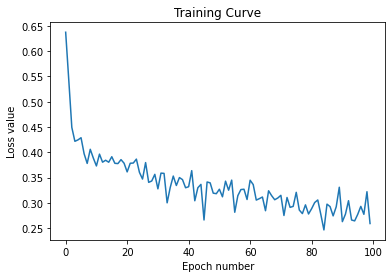

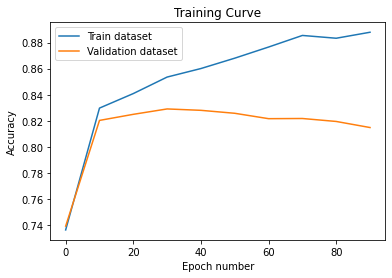

Model 1: Hardsigmoid
Epoch number: 1 | Loss value: 0.6664219498634338 | Train accuracy: 0.751 | Valid accuracy: 0.753
Epoch number: 11 | Loss value: 0.39386290311813354 | Train accuracy: 0.825 | Valid accuracy: 0.82
Epoch number: 21 | Loss value: 0.39245089888572693 | Train accuracy: 0.834 | Valid accuracy: 0.825
Epoch number: 31 | Loss value: 0.3736281096935272 | Train accuracy: 0.844 | Valid accuracy: 0.83
Epoch number: 41 | Loss value: 0.34808117151260376 | Train accuracy: 0.852 | Valid accuracy: 0.829
Epoch number: 51 | Loss value: 0.32508763670921326 | Train accuracy: 0.858 | Valid accuracy: 0.829
Epoch number: 61 | Loss value: 0.3237946033477783 | Train accuracy: 0.862 | Valid accuracy: 0.828
Epoch number: 71 | Loss value: 0.333551287651062 | Train accuracy: 0.864 | Valid accuracy: 0.821
Epoch number: 81 | Loss value: 0.3085743188858032 | Train accuracy: 0.875 | Valid accuracy: 0.825
Epoch number: 91 | Loss value: 0.3059588670730591 | Train accuracy: 0.88 | Valid accuracy: 0.825


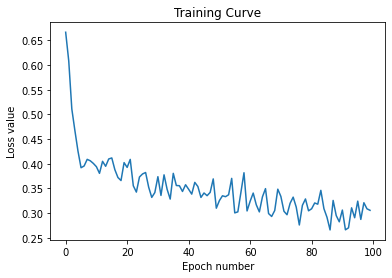

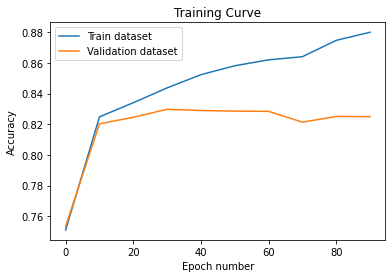

Model 1: ReLU
Epoch number: 1 | Loss value: 0.5551480650901794 | Train accuracy: 0.747 | Valid accuracy: 0.75
Epoch number: 11 | Loss value: 0.3788982927799225 | Train accuracy: 0.824 | Valid accuracy: 0.818
Epoch number: 21 | Loss value: 0.3803556263446808 | Train accuracy: 0.832 | Valid accuracy: 0.826
Epoch number: 31 | Loss value: 0.37338173389434814 | Train accuracy: 0.837 | Valid accuracy: 0.825
Epoch number: 41 | Loss value: 0.3836919665336609 | Train accuracy: 0.841 | Valid accuracy: 0.828
Epoch number: 51 | Loss value: 0.3467167913913727 | Train accuracy: 0.847 | Valid accuracy: 0.826
Epoch number: 61 | Loss value: 0.3057873249053955 | Train accuracy: 0.847 | Valid accuracy: 0.823
Epoch number: 71 | Loss value: 0.3406870663166046 | Train accuracy: 0.854 | Valid accuracy: 0.823
Epoch number: 81 | Loss value: 0.34565356373786926 | Train accuracy: 0.856 | Valid accuracy: 0.822
Epoch number: 91 | Loss value: 0.3351338803768158 | Train accuracy: 0.856 | Valid accuracy: 0.817


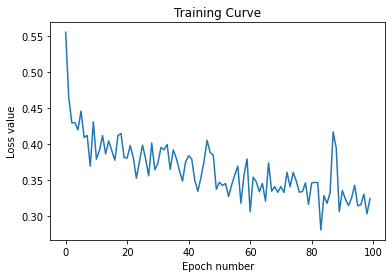

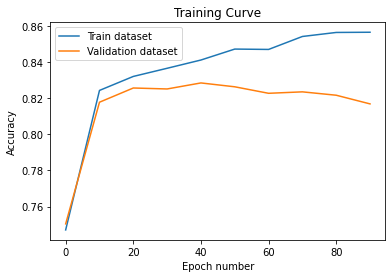

In [ ]:
print('Model 1: Sigmoid')
train_network(my_model_1, train_loader, valid_loader, num_epochs=100, learning_rate=0.001)

print('Model 1: Hardsigmoid')
train_network(my_model_2, train_loader, valid_loader, num_epochs=100, learning_rate=0.001)

print('Model 1: ReLU')
train_network(my_model_3, train_loader, valid_loader, num_epochs=100, learning_rate=0.001)

Funkcja sigmoidalna okazała się lepsza pod kątem trenowania oraz walidacji na danych 5000. Przy wykorzystaniu większej bazy danych - wyniki są bardzo podobne pomiędzy tymy trzema metodami

##LSTM

In [ ]:
#Model RNN do wiadomosci tweet

def get_rev_words(glove_vector, data): #argumenty: glove_vector - info o embeddingach, data = dane
    train, valid, test = [], [], []  #puste listy na dane treningowe, walidacyjne, do testowania
    for i, line in enumerate(clean_data_01):             
        review = line[0]        #tutaj znajduje sie dana recenzja - slowa z niej
        idx = [glove_vector.stoi[w] for w in review if w in glove_vector.stoi] #zapisuje indeksy slow ktore mialy embeddingi
        if not idx: #jezeli zdarzy sie recenzja bez zadnego embeddingu to pobiera kolejny rekord
            continue
        idx = torch.tensor(idx) #zapisuje indeksy jakot tensor
        label = torch.tensor(int(line[-1] == 1)).long() #label dla recenzji: 0 dla "0" lub 1 dla "1"
        #chce sobie podzielic dane na trzy kategorie: zbior treningowy, walidacyjny i testowy 
        if i < 35000:  #70% danych
            train.append((idx, label))
        elif i >= 35000 and i < 42500: #15 % danych
            valid.append((idx, label))
        else:            # pozostale 15% danych
            test.append((idx, label))
    return train, valid, test #zwraca zbior treningowy, walidacyjny i testowy


In [ ]:
train, valid, test = get_rev_words(glove, clean_data_01)

In [ ]:
class TBatcher:
    def __init__(self, tweets, batch_size=32, drop_last=False):
        self.tweets_by_length = {} #slownik, przechowuje klucze - dlugosci i wartosci - liste tweetow o zadanej dlugosci
        for words, label in tweets:
            wlen = words.shape[0] #liczy dlugosc tweeta (ile ma embeddingow)
            
            if wlen not in self.tweets_by_length: #jak jeszcze nie pojawil sie tweet o takiej dlugosci
                self.tweets_by_length[wlen] = []  #to stworz go i przypisz mu pustą liste
                
            self.tweets_by_length[wlen].append((words, label),) #dodaje do listy krotke slowa, label
         
        #tworze DataLoader dla kazdego zbioru tweetow o tej samej dlugosci
        self.loaders = {wlen : torch.utils.data.DataLoader(tweets, batch_size=batch_size, shuffle=True, drop_last=drop_last) for wlen, tweets in self.tweets_by_length.items()}
    
    #Iterator, to nie takie wazne...
    def __iter__(self): 
        iters = [iter(loader) for loader in self.loaders.values()] #tworze iterator dla kazdej dlugosci tweetow
        while iters:
            im = random.choice(iters) #generuje losowy iterator
            try:
                yield next(im)      #yield uzywamy kiedy iterujemy po sekwencji ale nie chcemy przechowywac calej sekwencji w pamieci (cos jak return)
            except StopIteration:
                iters.remove(im)

In [ ]:
train_loader = TBatcher(train, batch_size=32, drop_last=True)  #dane treningowe z batchem
valid_loader = TBatcher(valid, batch_size=32, drop_last=False)
test_loader = TBatcher(test, batch_size=32, drop_last=False)

In [ ]:


class T_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors) #embeddingi
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True) #LSTM
        self.fc = nn.Linear(hidden_size, num_classes)  #przeksztalcenie liniowe
    
    def forward(self, x):
        x = self.emb(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size) #początkowy  h0
        c0 = torch.zeros(1, x.size(0), self.hidden_size) #początkowy c0
        out, _ = self.lstm(x, (h0, c0))  #LSTM
        out = self.fc(out[:, -1, :]) #przeksztlcam jeszcze liniowo ostatni output
        return out

lstm_layer = nn.LSTM(input_size=200,   #wymiar wejscia - bo mam embeddingi 200D
                    hidden_size=5,   #wymiar cech w stanie ukrytym
                    batch_first=True)


In [ ]:
#funkcja do treningu
def training1(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss() #funkcja kosztu
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #optymalizator modelu
    losses, train_acc, valid_acc, epochs = [], [], [], []  #cztery listy na wartosci funkcji kosztu, dokladnosc na zbiorze testowym i walidacyjnym, numer epoki
    
    for epoch in range(num_epochs): #przechodz kolejne epoki (iteracje)
        for tweets, labels in train: #przechodzi dane ze zbioru testowego
            optimizer.zero_grad()   #zerowanie gradientu
            pred = model(tweets)    #co mowi model?
            loss = criterion(pred, labels)   #wartosc funkcji kosztu - porownanie tego co mowi model, a tego jak jest
            loss.backward()                  #pochodna po funkcji kosztu
            optimizer.step()                 #aktualizacja parametrow
        losses.append(float(loss))           #zapisz aktualną wartosc funkcji kosztu
        epochs.append(epoch)                 #zapisz aktualny numer epoki
        train_acc.append(get_accuracy(model, train_loader))   #dokladnosc na zbiorze treningowym
        valid_acc.append(get_accuracy(model, valid_loader))   #dokladnosc na zbiorze walidacyjnym
        print(f'Epoch number: {epoch+1} | Loss value: {loss} | Train accuracy: {round(train_acc[-1],3)} | Valid accuracy: {round(valid_acc[-1],3)}')
 
    #Rysowanie wykresow
    plt.title("Training Curve")
    plt.plot(losses, label="Train dataset")
    plt.xlabel("Epoch number")
    plt.ylabel("Loss value")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train dataset")
    plt.plot(epochs, valid_acc, label="Validation dataset")
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch number: 1 | Loss value: 0.24681729078292847 | Train accuracy: 0.809 | Valid accuracy: 0.8
Epoch number: 2 | Loss value: 0.3954489231109619 | Train accuracy: 0.836 | Valid accuracy: 0.828
Epoch number: 3 | Loss value: 0.4042879641056061 | Train accuracy: 0.843 | Valid accuracy: 0.832
Epoch number: 4 | Loss value: 0.40674301981925964 | Train accuracy: 0.859 | Valid accuracy: 0.846
Epoch number: 5 | Loss value: 0.3799833059310913 | Train accuracy: 0.865 | Valid accuracy: 0.85
Epoch number: 6 | Loss value: 0.17629599571228027 | Train accuracy: 0.874 | Valid accuracy: 0.854
Epoch number: 7 | Loss value: 0.4530225396156311 | Train accuracy: 0.879 | Valid accuracy: 0.86
Epoch number: 8 | Loss value: 0.2811526358127594 | Train accuracy: 0.883 | Valid accuracy: 0.859
Epoch number: 9 | Loss value: 0.3380205035209656 | Train accuracy: 0.89 | Valid accuracy: 0.863
Epoch number: 10 | Loss value: 0.21276429295539856 | Train accuracy: 0.893 | Valid accuracy: 0.868
Epoch number: 11 | Loss value:

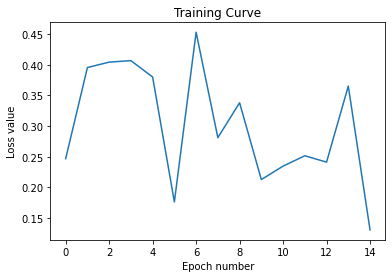

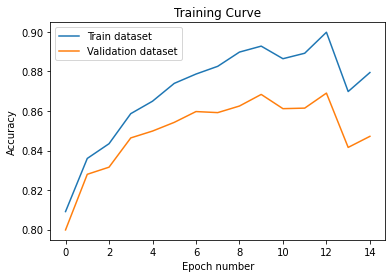

In [ ]:
model_lstm = T_LSTM(200, 50, 2) #model
training1(model_lstm, train_loader, valid_loader, num_epochs=15, learning_rate=2e-4) #trenuje

##GRU

Epoch number: 1 | Loss value: 0.3155116140842438 | Train accuracy: 0.823 | Valid accuracy: 0.813
Epoch number: 2 | Loss value: 0.15630193054676056 | Train accuracy: 0.844 | Valid accuracy: 0.835
Epoch number: 3 | Loss value: 0.3446069657802582 | Train accuracy: 0.863 | Valid accuracy: 0.854
Epoch number: 4 | Loss value: 0.24684736132621765 | Train accuracy: 0.871 | Valid accuracy: 0.862
Epoch number: 5 | Loss value: 0.1726265549659729 | Train accuracy: 0.879 | Valid accuracy: 0.864
Epoch number: 6 | Loss value: 0.18759803473949432 | Train accuracy: 0.883 | Valid accuracy: 0.867
Epoch number: 7 | Loss value: 0.43024399876594543 | Train accuracy: 0.883 | Valid accuracy: 0.864
Epoch number: 8 | Loss value: 0.18418608605861664 | Train accuracy: 0.893 | Valid accuracy: 0.872
Epoch number: 9 | Loss value: 0.3536083698272705 | Train accuracy: 0.899 | Valid accuracy: 0.875
Epoch number: 10 | Loss value: 0.14925019443035126 | Train accuracy: 0.901 | Valid accuracy: 0.875
Epoch number: 11 | Loss

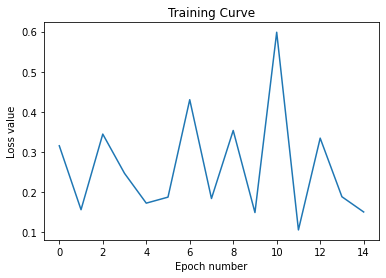

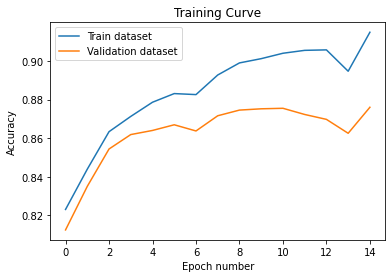

In [ ]:
gru_layer = nn.GRU(input_size=200,   #wymiar wejscia
                   hidden_size=5,   #wymiar cech w stanie ukrytym
                   batch_first=True) 

class T_GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors) #embeddingi
        self.hidden_size = hidden_size 
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)  #GRU
        self.fc = nn.Linear(hidden_size, num_classes)   #przeksztalcenie liniowe
    
    def forward(self, x):
        x = self.emb(x)  #embeddingi
        h0 = torch.zeros(1, x.size(0), self.hidden_size) #początkowy stan ukryty
        out, _ = self.gru(x, h0)   #GRU
        out = self.fc(out[:, -1, :]) #ostatni output przeksztalcamy liniowo jeszcze
        return out
    

model_gru = T_GRU(200, 50, 2) #buduje model
training1(model_gru, train_loader, valid_loader, num_epochs=15, learning_rate=2e-4) #trenuje

GRU okazało się skuteczniejsze pod kątem treningu i walidacji niż LSTM



---

---

W danym proekcie przeanalizowano kilka różnych klasycznych algorytmów 
nauczania maszynowego i analizę tekstu w oparciu o sieci neuronowe do analizy zbioru recenzji dla wyznaczenia skutecznych metod przewidywania typu recencji. Wszystkie algorytmy są dostatecznie skuteczne (dokładność metod jest wyższa 80%), przy tym w algorytmach opartych o sieci neuronowe można otrzymać lepsze wyniki przy doboru lepszym parametrów. Przy tym, metody oparte o sieci neuronowe przy zwiększeniu ilości danych można uważać więc skutecznymi przy poprawnym doboru danych.